In [181]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [182]:
from nltk.corpus import stopwords

In [183]:
strategy = pd.read_excel("RAW_FCM__Problems_and_Strategies_7.1.2019.xlsx")
strategy.columns = strategy.iloc[1]
strategy = strategy.iloc[2:]

In [184]:
#strategy.columns

In [185]:
strategy = strategy.rename(columns={'FCM: GRYD Client ID':'ID',
                                    'Description of targeted problem/issue_703': 'Problem',
                                    'Strategy recommended to address this problem_928':'Strategy',
                                    'Progress made? (select one)_934':'Progress'})
strategy = strategy.loc[:,['ID','Problem','Strategy','Progress']]
strategy = strategy.dropna()

In [186]:
strategy.head()

1,ID,Problem,Strategy,Progress
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress


In [187]:
len(strategy)

4039

Drop not applicable in the **Progress** column

In [188]:
drop = ['N/A - not applicable to this phase']
df = strategy[~strategy['Progress'].isin(drop)]
len(df)

3739

In [189]:
df = strategy

In [190]:
prob_list = df['Problem'].tolist()
prob_list = [s.lower() for s in prob_list]
df['Problem'] = prob_list

In [191]:
df.Problem.value_counts().keys().tolist()

['client requested assistance with employment search',
 'client requires consistent contact from cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations',
 'client requires consistent contact with cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations',
 'peer pressure',
 'anger issues',
 'unemployed',
 'client is on probation',
 'family issues',
 'client requested assistance with housing search',
 'client requested assistance with job search',
 'client is currently on probation.',
 'client is on probation ',
 'clt does not have ca id. ',
 'client requested assistance exploring postsecondary options',
 'clt is not employed. ',
 'substance abuse',
 'employment',
 'client needs substance abuse workshops.',
 'client in need of school support',
 'probation',
 'client in need of mentoring ',
 'client is in need of school support',
 'client requested assistance exploring post secondary options',
 'scho

In [192]:
for i in range(len(prob_list)):
    if 'employment search' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'unemployed' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'job' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'employment' in prob_list[i]:
        prob_list[i] = 'employment related issue'     
    elif 'not employed' in prob_list[i]:
        prob_list[i] = 'employment related issue'
        

    elif 'postsecondary' in prob_list[i]:
        prob_list[i] = 'postsecondary option'
    elif 'post secondary' in prob_list[i]:
        prob_list[i] = 'postsecondary option'
    
    elif 'navagate interpersonal relationship' in prob_list[i]:
        prob_list[i] = 'navagate interpersonal relationship'
    elif 'navagatre interpersonal relationships' in prob_list[i]:
        prob_list[i] = 'navagate interpersonal relationship'


In [193]:
#drop = ['N/A - not applicable to this phase']
#df = df[~df['To what extent has this strength blossomed? (select one)_916'].isin(drop)]

In [194]:
len(prob_list)

4039

In [195]:
df['Problem'] = prob_list

In [196]:
df.Problem.value_counts()

employment related issue                                                                                                                                                      595
navagate interpersonal relationship                                                                                                                                           116
postsecondary option                                                                                                                                                           28
peer pressure                                                                                                                                                                  25
anger issues                                                                                                                                                                   23
client is on probation                                                                                        

In [197]:
df_new = df[df['Strategy'] != '40 developmental assets']
len(df_new)

4037

In [198]:
from string import punctuation
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [199]:
def normalize(contents):
    
    for i in range (len(contents)):
        contents[i]=contents[i].replace(",", " ")
    all_contents = [''.join([c for c in i if not c.isdigit()]) for i in contents]
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
        
    lem_texts = []
    lemmatizer = WordNetLemmatizer()
    for i in all_contents:
        lem_texts.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(i)])
    new_texts = [' '.join([c for c in i]) for i in lem_texts] # a list of lemmatized sentences
    
    clean_tokens = list()
    sw = stopwords.words('english')
    other = ['client','clt','ct','need','request','require','want', 'would', 'like',
             '100', '12','week','13','year','14','18','1yr','20','hr','3yr','check',
             '40','50','70','75','80','10','1012','2018','25','community','hour','30']
    sw = sw + other
    for i in range(0,len(new_texts)):
        clean_tokens.append(' '.join([w for w in word_tokenize(new_texts[i]) if w not in sw]))         
    return clean_tokens # a list of sentences without useless words

In [200]:
normalized_texts = normalize(prob_list)

In [201]:
normalized_texts

['expunge record',
 'employment related issue',
 'poor grade get well grade',
 'dont believe',
 'lot issue foster kid look real mom always thought find sibling',
 'low self esteem',
 'girl drama school gossip cm individual session anger management',
 'mother get fight get kick house move grandparent father parent',
 'employment related issue',
 'employment related issue',
 'low self esteem',
 'low self esteem',
 'low self esteem',
 'employment related issue',
 'employment related issue',
 'employment related issue',
 'anger management',
 'productive life interested youth fire academy',
 'get kick sea crenshaw cm find school',
 'gedhs diploma',
 'gedhs diploma',
 'reading help',
 'employment related issue',
 'employment related issue',
 'anger promblems',
 'employment related issue',
 'employment related issue',
 'employment related issue',
 'understand anger come',
 'employment related issue',
 'tap card get bus school since money',
 'anger issue help',
 'get probation',
 'student say 

In [202]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
normalized_texts[0:10]

['expunge record',
 'employment related issue',
 'poor grade get well grade',
 'dont believe',
 'lot issue foster kid look real mom always thought find sibling',
 'low self esteem',
 'girl drama school gossip cm individual session anger management',
 'mother get fight get kick house move grandparent father parent',
 'employment related issue',
 'employment related issue']

In [203]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2))
# features are stored in X
X = tfidf.fit_transform(normalized_texts)

In [204]:
# feature names
terms = tfidf.get_feature_names()

In [205]:
terms

['aa',
 'aa class',
 'abandonment',
 'abide',
 'abide demand',
 'ability',
 'ability stay',
 'able',
 'absence',
 'abuse',
 'abuse activity',
 'abuse alcohol',
 'abuse class',
 'abuse issue',
 'abuse problem',
 'abuse workshop',
 'academic',
 'academic attendance',
 'academic behavior',
 'academic challenge',
 'academic motivation',
 'academic performance',
 'academic score',
 'academically',
 'academy',
 'access',
 'access high',
 'accord',
 'accord fight',
 'accord participant',
 'acquire',
 'acquire driver',
 'acquire high',
 'acquire work',
 'act',
 'act impulsively',
 'act know',
 'action',
 'action caught',
 'action make',
 'active',
 'active area',
 'active gang',
 'active member',
 'active negative',
 'active tag',
 'activity',
 'activity know',
 'activity life',
 'activity living',
 'addict',
 'addiction',
 'admit',
 'admit affiliate',
 'admit drug',
 'adult',
 'adult school',
 'advise',
 'advisor',
 'affect',
 'affected',
 'affiliate',
 'affiliate crew',
 'affiliate friend',


In [206]:
tfidf_df = pd.DataFrame(X.todense(), 
                        columns=tfidf.get_feature_names())

In [207]:
#tfidf_df.head()

In [208]:
all(tfidf_df.iloc[16,:]==0)

False

In [209]:
row1 = tfidf_df.iloc[16,:]
row1[row1 != 0]

anger               0.502057
anger management    0.615421
management          0.607615
Name: 16, dtype: float64

Implementing K means clustering algorithm

In [210]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

Find optimal number of clusters **k**

In [237]:
pca = PCA(n_components=30)
X_reduced= pca.fit_transform(X.toarray())
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

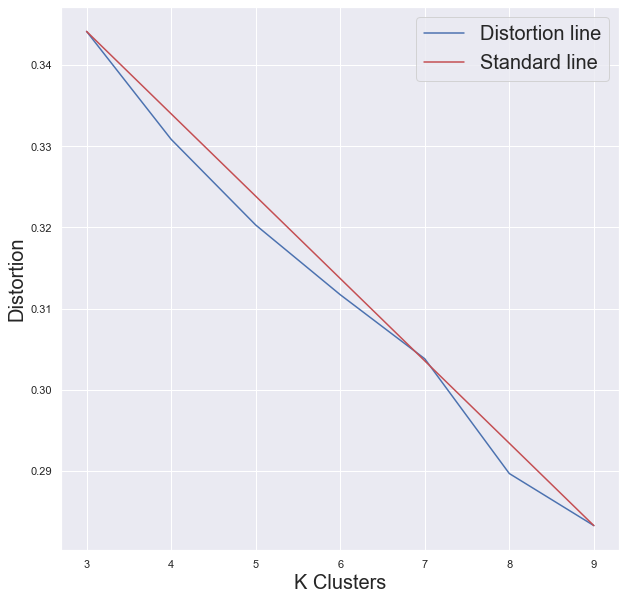

In [247]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-',label='Distortion line')
plt.plot(X_line, Y_line, 'r',label='Standard line')
plt.xlabel('K Clusters',fontsize=20)
plt.ylabel('Distortion',fontsize=20)
plt.legend(prop={"size":20})

plt.savefig('Problem_k.pdf')  


In [ ]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

In [71]:
tsne = TSNE(verbose=1, perplexity=80,n_iter=5000,learning_rate=150)
X_embedded = tsne.fit_transform(X_reduced)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 4039 samples in 0.055s...
[t-SNE] Computed neighbors for 4039 samples in 2.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4039
[t-SNE] Computed conditional probabilities for sample 2000 / 4039
[t-SNE] Computed conditional probabilities for sample 3000 / 4039
[t-SNE] Computed conditional probabilities for sample 4000 / 4039
[t-SNE] Computed conditional probabilities for sample 4039 / 4039
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.497375
[t-SNE] KL divergence after 5000 iterations: 0.509413


In [72]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [73]:
#order_centroids

In [74]:
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind])

Cluster 0:
 employment
 related issue
 employment related
 related
 issue
 zone
 fast lash
 fast especially
Cluster 1:
 id
 ca id
 ca
 california id
 california
 state id
 state
 obtain
Cluster 2:
 school
 anger
 work
 issue
 assistance
 service
 member
 get
Cluster 3:
 navagate interpersonal
 interpersonal relationship
 navagate
 interpersonal
 relationship
 fast lash
 fast especially
 fast
Cluster 4:
 probation
 complete
 service
 currently probation
 complete service
 currently
 requirement
 probation requirement


In [75]:
y_pred = model.fit_predict(X)

In [76]:
len(y_pred)

4039

In [77]:
df['Problem_Classification'] = y_pred
#df.drop('Classification', axis=1, inplace=True)

In [82]:
df.loc[df['Problem_Classification']==4]

1,ID,Problem,Strategy,Progress,Problem_Classification
6,77th 1-16-45-1,employment related issue,speak to teacher about mother and refer client...,Task/Service successfully completed,4
21,77th 1-16-114-1,employment related issue,CM will have her start Job Readiness Program i...,Task/Service successfully completed,4
22,77th 1-16-115-1,employment related issue,Client will join CM Job Readiness Program star...,N/A - not applicable to this phase,4
28,77th 1-16-253-1,employment related issue,CM GAVE HER A JOB LEAD AT A TEMP SERVICE,Task/Service successfully completed,4
29,77th 1-16-259-1,employment related issue,WORKING ON JOB READINESS WITH CLIENT THEN BUIL...,A Little progress,4
337,SSSEA-0-126-1,employment related issue,CM gave client a flier so he can attend orient...,No progress,4
376,SSSEA-0-173-1,employment related issue,CM will take client to Fat Burger to fill out ...,Good progress,4
377,SSSEA-0-173-1,employment related issue,Sent client to 54th & Crenshaw Youth Worksourc...,No progress,4
379,SSSEA-0-174-1,employment related issue,CM went to the new Fatburger on slauson and Cr...,Task/Service successfully completed,4
384,SSSEA-0-177-1,employment related issue,CM gave client a flier to attend job readiness...,No progress,4


In [89]:
# short label
labels = {4:'Employment issues', 
          0:'Emotion/behavior issues', 
          1:'Probation issues', 
          2:'Substance abuse issues', 
          3:'School related issues'}

In [90]:
df["Problem_Label"] = df["Problem_Classification"].map(labels)

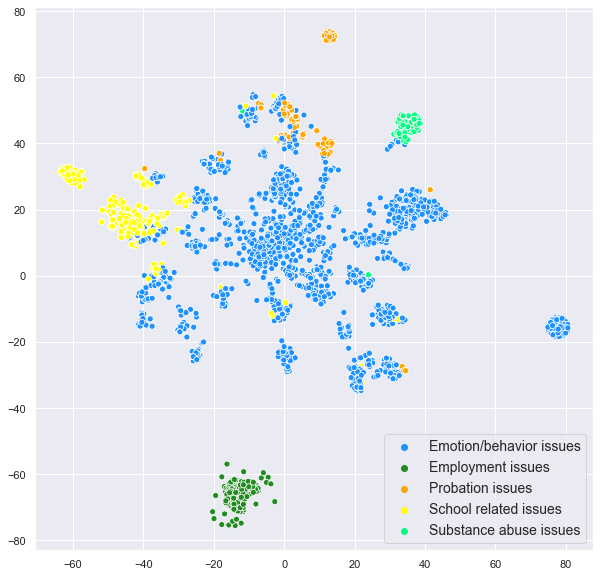

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})


color_dict = dict({'Emotion/behavior issues':'dodgerblue',
                  'Employment issues':'forestgreen',
                  'Probation issues': 'orange',
                  'Substance abuse issues': 'springgreen',
                  'School related issues': 'yellow'})
                  #'sixth':'yellow',
        
                  


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=df['Problem_Label'].values, legend='full', palette=color_dict)
plt.legend(fontsize=14)


plt.savefig('Problem.pdf')  

In [108]:
df.to_csv('FCM_Problems_and_Strategies_with_labels_6.csv', index=False)

In [109]:
df.head()

1,ID,Problem,Strategy,Progress,Problem_Classification,Problem_Label
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed,0,Emotion/behavior issues
6,77th 1-16-45-1,employment related issue,speak to teacher about mother and refer client...,Task/Service successfully completed,4,Employment issues
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase,0,Emotion/behavior issues
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress,0,Emotion/behavior issues
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress,0,Emotion/behavior issues


In [110]:
df.iloc[1,4]

4

In [111]:
df

1,ID,Problem,Strategy,Progress,Problem_Classification,Problem_Label
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed,0,Emotion/behavior issues
6,77th 1-16-45-1,employment related issue,speak to teacher about mother and refer client...,Task/Service successfully completed,4,Employment issues
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase,0,Emotion/behavior issues
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress,0,Emotion/behavior issues
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress,0,Emotion/behavior issues
15,77th 1-16-81-1,low self esteem,LIFE SKILLS- SELF LOVE,Some progress,0,Emotion/behavior issues
16,77th 1-16-95-1,client has girl drama at school with gossiping...,One on One Anger Management skills,Task/Service successfully completed,0,Emotion/behavior issues
19,77th 1-16-110-1,client and mother got into a fight and she got...,refer her to a youth pastor,Good progress,0,Emotion/behavior issues
21,77th 1-16-114-1,employment related issue,CM will have her start Job Readiness Program i...,Task/Service successfully completed,4,Employment issues
22,77th 1-16-115-1,employment related issue,Client will join CM Job Readiness Program star...,N/A - not applicable to this phase,4,Employment issues
